# Predicting Bike Rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### show the 'cnt' column values

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

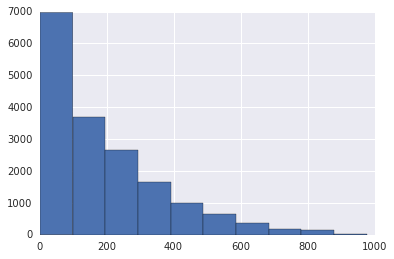

In [3]:
%matplotlib inline

plt.hist(bike_rentals['cnt'])


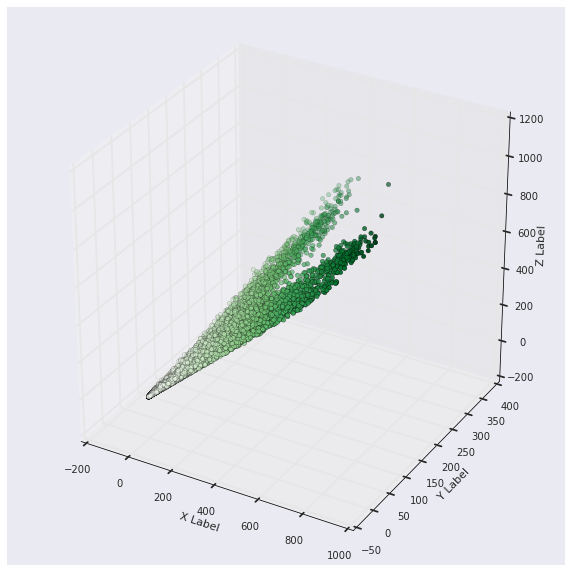

In [4]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

xdata = bike_rentals['registered']
ydata = bike_rentals['casual']
zdata = bike_rentals['cnt']

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Feature Engineering

### 1. Show the correlations between all features and 'cnt'

In [5]:
corr = bike_rentals.corr()
corr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


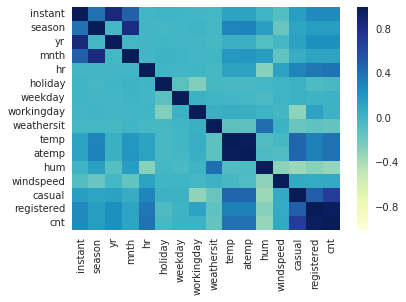

In [6]:
sns.heatmap(corr,cmap="YlGnBu")

In [7]:
rank = abs(corr['cnt']).sort_values(ascending=False)
rank

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

From the results displayed above, we can find that the features:
 - registered
 - casual
 - temp
 - atemp
 - hr
 - hum
 - instant
 
are most correlated to **cnt**. However, 'registered' and 'casual' are two features that cnt directly derived from. And atemp is also created from temp. So we will remove these features when train models.

### 2. Create New features

In [8]:
def assign_label(row):
    
    if row['hr'] >= 6 and row['hr'] < 12:
        return 1
    elif row['hr'] >= 12 and row['hr'] <18:
        return 2
    elif row['hr'] >=18 and row['hr'] <24:
        return  3
    elif row['hr'] >=0 and row['hr'] < 6:
        return  4  

In [9]:
bike_rentals['time_label'] = bike_rentals.apply(
    lambda row: assign_label(row), axis=1)


## Modelling

Since the target column **cnt** contains continuous numbers,  we choose three models to complete the predictions:
 - Linear Regression
 - Decision Tree
 - Random Forest
 
For linear Regression, the Mean_squared_error will be used as error metric to evaluate the accuracy.

For Decision Tree and Random Forest model, AUC can be used to evaluate the model's accuracy

### 1. Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [11]:
features = list(bike_rentals.columns)
features.remove('registered')
features.remove('casual')
features.remove('cnt')
features.remove('dteday')

In [12]:
train = bike_rentals.sample(frac=0.8)

test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [13]:
lr = LinearRegression()

lr.fit(train[features], train['cnt'])
lr_predictions = lr.predict(test[features])
lr_error = mean_squared_error(test['cnt'], lr_predictions)
print('Linear Regression Model error is: ', lr_error)

Linear Regression Model error is:  17356.194163435826


In [14]:
# Remove some weak features 

new_features = features.copy()

for i in features:
    if i in corr['cnt'].index and abs(corr['cnt'].loc[i]) <0.2:
        new_features.remove(i)       
new_features        

['instant', 'yr', 'hr', 'temp', 'atemp', 'hum', 'time_label']

In [15]:
lr.fit(train[new_features], train['cnt'])
new_predictions = lr.predict(test[new_features])
new_error = mean_squared_error(test['cnt'],new_predictions)
print('Error of Linear Regression model with new featues: ', new_error)

Error of Linear Regression model with new featues:  17553.229057792974


By removing the less correlated features, the MSE increased, indicating that even features with correlation coefficients can imporve the accuracy.

The MSE of LR model is large, which may be resulted by some extreme values.

### 2. Decision Tree



In [16]:
dt = DecisionTreeRegressor(min_samples_leaf=4)

dt.fit(train[features], train['cnt'])
dt_predictions = dt.predict(test[features])
dt_error = mean_squared_error(test['cnt'], dt_predictions)

print('MSE of Decision Tree is: ', dt_error)

MSE of Decision Tree is:  2634.971491229787


we can adjust the parameters in Decision Tree and track the MSE to prevent overfit to find the optimal results.

In [18]:
# adjust the max_depth parameter
max_depth = [i for i in range(1,10)]
train_mses = []
test_mses = []

for i in range(1,10):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(train[features], train['cnt'])
    
    train_pred = regressor.predict(train[features])
    train_mse = mean_squared_error(train['cnt'], train_pred)
    train_mses.append(train_mse)
    
    test_pred = regressor.predict(test[features])
    test_mse = mean_squared_error(test['cnt'],test_pred)
    test_mses.append(test_mse)


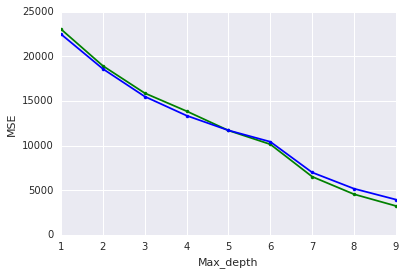

In [20]:
plt.plot(max_depth, train_mses, c='green',marker ='.')
plt.plot(max_depth, test_mses, c='blue',marker ='.')
plt.xlabel('Max_depth')
plt.ylabel('MSE')

In [26]:
min_samples_leaf=[i for i in range(2, 20)]
train_mses_ , test_mses_= list(), list()

for i in min_samples_leaf:
    regressor = DecisionTreeRegressor(min_samples_leaf=i)
    regressor.fit(train[features], train['cnt'])
    
    train_pred = regressor.predict(train[features])
    train_mse = mean_squared_error(train['cnt'], train_pred)
    train_mses_.append(train_mse)
    
    test_pred = regressor.predict(test[features])
    test_mse = mean_squared_error(test['cnt'],test_pred)
    test_mses_.append(test_mse)


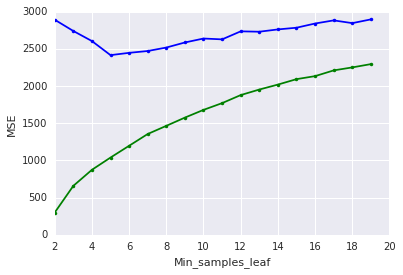

In [27]:
plt.plot(min_samples_leaf, train_mses_, c ='green', marker = '.')
plt.plot(min_samples_leaf, test_mses_, c='blue',marker ='.')
plt.xlabel('Min_samples_leaf')
plt.ylabel('MSE')

The parameter 'min_samples_leaf' performs better than the parameter 'max_depth'. To prevent overfitting, keep the balacne between the mse of training and testing dataset, we can choose min_samples_leaf = 10 when using DTR.

### 3. Random Forest

In [68]:
rf = RandomForestRegressor(min_samples_leaf=2)

rf.fit(train[features], train['cnt'])
rf_predictions = rf.predict(test[features])
rf_error = mean_squared_error(test['cnt'], rf_predictions)

print('MSE of Ramdom Forest is: ', rf_error)


MSE of Ramdom Forest is:  1687.3283588723816
